In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

sns.set()

# PyTorch

PyTorch nos ofrece una serie de herramientas que no solo nos permite armar redes profundas, sino ademas realizar diferentes operaciones de transformaciones y mediciones de metricas de evaluación.

Hoy en dia es una libreria muy popular, dado que nos facilita realizar procesamiento que normalmente se necesitaria de conocimientos más avanzados de programación, como por ejemplo, el acceso al uso de la GPU, en el cual es transparente al usuario.

Además, el uso de PyTorch es mas pythonic que Tensorflow, por lo que si uno está familiarizado con Python, encuentra mas facil el uso de PyTorch que Tensorflow.

## Instalación 

En este caso vamos a instalar sin realizar nada para hacer andar la GPU, eso lo verán más adelante o pueden buscar tutoriales en internet. Esto dependerá de que marca de GPU tengan o inclusive de arquitectura.

Para instalar PyTorch unicamente para CPU hacemos:

`!pip3 install torch torchvision torchaudio`

In [2]:
# Llamamos a la libreria
import torch

## Tensores de PyTorch

PyTorch nos presenta una estructura de datos similar a arrays o matrices, llamada tensores. Los tensores es nuestra estructura que nos permite codificar nuestras entradas o salidas

In [3]:
# Igual que Numpy podemos crear tensores a mano

tensor1 = torch.tensor([1, 2])
tensor2 = torch.tensor([[1, 2], [3, 4]])

In [4]:
tensor1

tensor([1, 2])

In [5]:
tensor2

tensor([[1, 2],
        [3, 4]])

In [6]:
# Podemos crearlo desde un array de Numpy, lo que nos da la forma de interactuar entre ellos

numpy_array = np.ones([10, 3])
tensor3 = torch.from_numpy(numpy_array)

In [7]:
tensor3

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [8]:
#Tambien tenemos formas similares a la de numpy
shape = (2,3)

rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Tensor aleatorio: \n {rand_tensor} \n")
print(f"Tensor de unos: \n {ones_tensor} \n")
print(f"Tensor de ceros: \n {zeros_tensor}")

Tensor aleatorio: 
 tensor([[0.6448, 0.5938, 0.0793],
        [0.5475, 0.8504, 0.9119]]) 

Tensor de unos: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Tensor de ceros: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [9]:
# Igual que Numpy, los tensores tiene atributos que nos permiten 
# entender mejor como estan formados

print(f"Tamaño del tensor: {rand_tensor.shape}")
print(f"Tipo de dato del tensor: {rand_tensor.dtype}")
print(f"En donde está guardado el tensor: {rand_tensor.device}")

Tamaño del tensor: torch.Size([2, 3])
Tipo de dato del tensor: torch.float32
En donde está guardado el tensor: cpu


Torch tiene como 100 operaciones de tensores implementadas. Incluyen operaciones aritmeticas, algebra lineal, manipulacion de matrices, sampleo, concatenado, etc. La lista completa de cosas que se pueden hacer la pueden ver [acá](https://pytorch.org/docs/stable/torch.html)

In [10]:
tensor_test = torch.ones(4, 4)
print(f"Primera fila: {tensor_test[0]}")
print(f"Primera columna: {tensor_test[:, 0]}")
print(f"Ultima columna: {tensor_test[:, -1]}")

# Asignamos usando slicing
tensor_test[:,1] = 0
print(tensor_test)

Primera fila: tensor([1., 1., 1., 1.])
Primera columna: tensor([1., 1., 1., 1.])
Ultima columna: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [11]:
# Como podemos ir de Numpy -> Tensor, podemos ir al revez
numpy_array = tensor_test.numpy()

print(numpy_array)

# Si tenemos la GPU habilitada, esto es mas poderoso, porque nos permite ir de 
# CPU a GPU y viceversa

[[1. 0. 1. 1.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]]


## Datasets y dataloaders

PyTorch tambien nos da herramientas para manejar datasets. Para ello nos provee de *torch.utils.data.DataLoader* y *torch.utils.data.Dataset*. Dataset nos permite almacenar observaciones y labels, y DataLoader nos permite definir iterables para permitinos acceder a los datos.

Aqui no lo vamos a usar, pero es interesante mencionar, sobretodo cuando se trabaja con datasets dificiles de usar, como imagenes o audios.

## Construyendo una red neuronal

Dado que como vimos que una red está conformado por capas:

![](./neuronnetex.png)

Por lo que la forma que construimos redes en PyTorch es de similar forma. Aca vamos a construir todas redes *fully connected* que son redes feed-foward. 

Para construir una red neuronal, creamos una clase que hereda la clase **torch.nn.Module**. *torch.nn.Module*  cuenta con todos los bloques con todos los bloques que se necesita para construir una red neuronal y permite realizar todas las operaciones para obtener un valor de salida.

Empecemos creando algunas redes

### Perceptron

Para crear el perceptron creamos una clase llamada **perceptron** que tiene como padre a **torch.nn.Module**. En su *init()* definimos a las capas:

- torch.nn.Sequential: Es un contenedor que nos permite ir apilando las capas que queremos de nuestra red. Este contenedor ademas se ocupa de conectas a las capas
- torch.nn.Linear: Es la capa que tiene los pesos de la entrada. En PyTorch, esa capa hay que especificarla, para que quede claro que es lineal (recordar w1x1 + x2x2 +...)
- torch.nn.Sigmoid: Es la capa de funcion de activacion que usaos (Sigmoide)



In [12]:
class perceptron(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()

        self.layers = torch.nn.Sequential(
            torch.nn.Linear(input_size, output_size),
            torch.nn.Sigmoid()
        )
        
    #Define a la parte de prediccion
    def forward(self, x):

        # Pasamos por el perceptron
        y_prob = self.layers(x)

        return y_prob
    
    def digital_out(self, x):

        y_prob = self.layers(x)

        return torch.heaviside((y_prob * 2) - 1, values=torch.tensor(0.))
        

Para arrancar, entremos a la red para que aprenda la función AND

In [13]:
# Entrenos al perceptron para que pueda reproducir a la funcion AND de tres variables
X_array = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1.]])

X = torch.from_numpy(X_array)
X = X.to(torch.float32)

y = torch.zeros((8, 1))
y[-1] = 1

Para entrenar con PyTorch necesitamos:

- Una función de coste que nos permita calcular el error. Es la función para que podamos movernos con el gradiente dado los pesos. Las que nos ofrece PyTorch la podemos ver [acá](https://pytorch.org/docs/stable/nn.html#loss-functions)
- Un optimizador que nos permita encontrar los pesos sinápticos al aplicar back-propagation. Hay muchas variantes del gradiente descendiente. Aqui usaremos Stochastic Gradient Descendient. Pueden ver más información [acá](https://pytorch.org/docs/stable/optim.html#torch.optim.Optimizer)

Entonces para entrenar debemos:

1. Iniciar la red, el optimizador y la funcion de coste.
2. Fijar los gradientes en cero. Esto nos permite limpiar calculos viejos.
3. Obtener una predicción inicial de la red
4. Calcular el error generado por la red.
5. Propagar el error mediante back-propagation.
6. Aplicamos el optimizador
7. Repetimos los pasos 2 al 6

In [14]:
# Creamos el perceptron de tres entrada y una salida
net = perceptron(3, 1)
# Usamos como funcion de error a MSE
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1)

# Creamos una lista que mida el error en el loop
errors = list()

# Realizamos la iteracion
for epoch in range(500):

    # Para cada uno de los datos del dataset
    values = np.random.permutation(X.shape[0])
    for i in values:
        # Limpiamos los gradientes
        optimizer.zero_grad()

        # Obtenemos todas las predicciones
        outputs = net(X[i])

        # Calculamos el error
        loss = criterion(outputs, y[i])

        # Propagamos el error
        loss.backward()

        # Optimizamos los parametros
        optimizer.step()

    errors.append(loss.item())


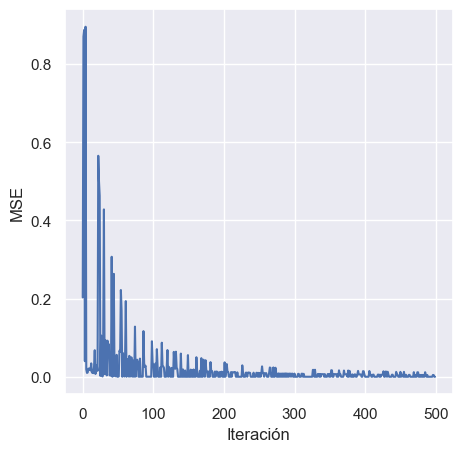

In [15]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(errors)
ax.set_ylabel("MSE")
ax.set_xlabel("Iteración")
plt.show();

In [16]:
# Probemos a la red
test_1 = net.digital_out(torch.tensor([0., 0, 1]))
test_2 = net.digital_out(torch.tensor([1., 1, 1]))

print(f"Si la entrada es 0, 0, 1, la salida es: {test_1.item()}")
print(f"Si la entrada es 1, 1, 1, la salida es: {test_2.item()}")


Si la entrada es 0, 0, 1, la salida es: 0.0
Si la entrada es 1, 1, 1, la salida es: 1.0


## Perceptron como regresión

Usando un perpectron, usemoslo en un ejemplo de regresión. Para ello vamos a convertir de Farenheit a Celsium. En la vida real, esto no tendria sentido, pero es a modo didactico.

In [17]:
# Primero definamos la funcion, que nos devuelva el valor de grado centigrado dado Farenheit
def far_to_celsium(farenheit):
    return (farenheit - 32) / 1.8

X_numpy = np.linspace(0, 220, 60000).reshape([-1, 1])
y_numpy = far_to_celsium(X_numpy).reshape([-1, 1])

# Creamos los valores de entrada
X = torch.from_numpy(X_numpy).reshape([-1, 1])
X = X.to(torch.float32)

y = torch.from_numpy(y_numpy).reshape([-1, 1])
y = y.to(torch.float32)

In [18]:
# Creamos el perceptron para regresion
class perceptron(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # En este caso solo nos quedamos con los datos lineales
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(1, 1),
        )
    
    def forward(self, x):

        # Pasamos por el perceptron
        y_prob = self.layers(x)

        return y_prob

In [19]:
# Creamos el perceptron para regresion
net = perceptron()
# Usamos como funcion de error a MSE
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.00001)

# Creamos una lista que mida el error en el loop
errors = list()

# Realizamos la iteracion
for epoch in range(40000):

    values = np.random.permutation(X.shape[0]) 

    subsetX = X[values[:50]]
    subsety = y[values[:50]]

    # Limpiamos los gradientes
    optimizer.zero_grad()

    # Obtenemos todas las predicciones
    outputs = net(subsetX)

    # Calculamos el error
    loss = criterion(outputs, subsety)

    # Propagamos el error
    loss.backward()

    # Optimizamos los parametros
    optimizer.step()

    errors.append(loss.item())

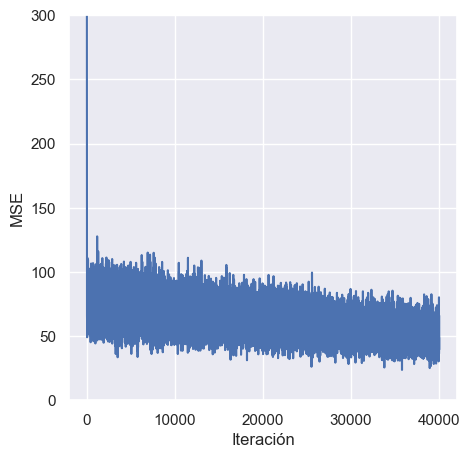

In [20]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(errors)
ax.set_ylabel("MSE")
ax.set_xlabel("Iteración")
ax.set_ylim([0, 300])
plt.show();

In [21]:
# Probemos a la red
test_1 = torch.tensor([[73.4]])
test_1 = test_1.to(torch.float32)
test_2 = torch.tensor([[104]])
test_2 = test_2.to(torch.float32)

print(f"Si tenemos 73.4F, en centigrado segun el modelo es: {net(test_1).item()}")
print(f"Si tenemos 73.4F, en centigrado de verdad es: {far_to_celsium(73.4)}")
print(f"Si tenemos 104F, en centigrado es: {net(test_2).item()}")
print(f"Si tenemos 104F, en centigrado de verdad es: {far_to_celsium(104)}")

Si tenemos 73.4F, en centigrado segun el modelo es: 30.246517181396484
Si tenemos 73.4F, en centigrado de verdad es: 23.000000000000004
Si tenemos 104F, en centigrado es: 44.312171936035156
Si tenemos 104F, en centigrado de verdad es: 40.0


## Red Feed-Foward en Heart

Usemos un caso real para probar el modelo, el dataset [**Heart**](https://archive.ics.uci.edu/dataset/45/heart+disease) que usamos anteriormente.

Recordemos que son mediciones de 1025 pacientes, con 13 atributos de variables fisiologicas. Además contamos con una columna de valores binarios llamada **target** que nos indica si el paciente tiene una enfermedad coronaria o no.

Para practicar el modelo SVM como clasificador (SVC), vamos a volver a usar el dataset [**Heart**](https://archive.ics.uci.edu/dataset/45/heart+disease), el cual mediciones de 1025 pacientes, con 13 atributos de variables fisiologicas. Además contamos con una columna de valores binarios llamada **target** que nos indica si el paciente tiene una enfermedad coronaria o no.

In [22]:
# Cargamos el dataset
df_heart = pd.read_csv("./Heart.csv")

# Hacemos variable dummy a las categoricas
categorical_features = ["cp", "restecg", "slope", "ca", "thal"]
df_heart_dummies = pd.get_dummies(data=df_heart, columns=categorical_features)

df_heart_dummies.drop(columns=["cp_3", "restecg_2", "slope_2", "ca_4", "thal_3"], inplace=True)

X = df_heart_dummies.drop(columns='target').values
y = df_heart.iloc[:, -1].values

# Separemos el test de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# Y el de validacion
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42)

# Escalamos las variables
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

X_train = torch.from_numpy(X_train)
X_train = X_train.to(torch.float32)
X_test = torch.from_numpy(X_test)
X_test = X_test.to(torch.float32)
X_val = torch.from_numpy(X_val)
X_val = X_val.to(torch.float32)

y_train = torch.from_numpy(y_train)
y_train = y_train.to(torch.float32)
y_test = torch.from_numpy(y_test)
y_test = y_test.to(torch.float32)
y_val = torch.from_numpy(y_val)
y_val = y_val.to(torch.float32)


In [23]:
class feed_foward(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.layers = torch.nn.Sequential(
            torch.nn.Linear(22, 7),
            torch.nn.ReLU(),
            torch.nn.Linear(7, 1),
            torch.nn.Sigmoid()
        )
        
    #Define a la parte de prediccion
    def forward(self, x):

        # Pasamos por el perceptron
        y_prob = self.layers(x)

        return y_prob
    
    def digital_out(self, x):

        y_prob = self.layers(x)

        return torch.heaviside((y_prob * 2) - 1, values=torch.tensor(0.))

In [24]:
# Creamos el perceptron para regresion
net = feed_foward()
# Usamos como funcion de error a log loss
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)

# Creamos una lista que mida el error en el loop
errors = list()
errors_val = list()

# Realizamos la iteracion
for epoch in range(8000):

    values = np.random.permutation(X_train.shape[0]) 

    subsetX = X_train[values[:200]]
    subsety = y_train[values[:200]]

    # Limpiamos los gradientes
    optimizer.zero_grad()

    # Obtenemos todas las predicciones
    outputs = net(subsetX)

    # Calculamos el error
    loss = criterion(outputs, subsety.reshape([-1, 1]))

    # Propagamos el error
    loss.backward()

    # Optimizamos los parametros
    optimizer.step()

    # Medimos el error de validacion
    outputs_val = net(X_val)
    loss_val = criterion(outputs_val, y_val.reshape([-1, 1]))
    
    errors.append(loss.item())
    errors_val.append(loss_val.item())
    

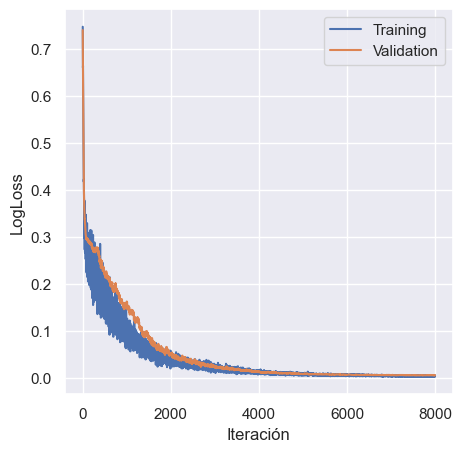

In [25]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(errors, label="Training")
ax.plot(errors_val, label="Validation")
ax.set_ylabel("LogLoss")
ax.set_xlabel("Iteración")
ax.legend()
plt.show();

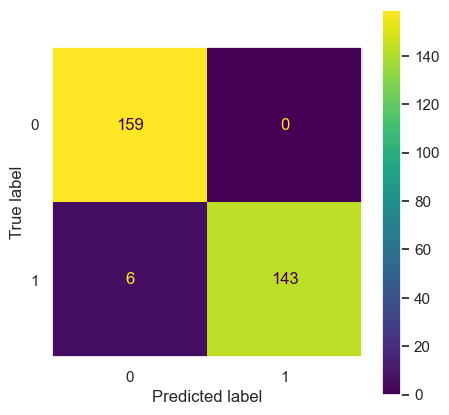

In [26]:
y_prob = net(X_test).detach().numpy().reshape(-1)
y_pred = net.digital_out(X_test).detach().numpy().reshape(-1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

In [27]:
print(f"El porcentaje de exactitud es de:{accuracy_score(y_test, y_pred)*100: .0f}%")
print(f"F1-score de testeo fue: {f1_score(y_test, y_pred)}")

El porcentaje de exactitud es de: 98%
F1-score de testeo fue: 0.9794520547945206


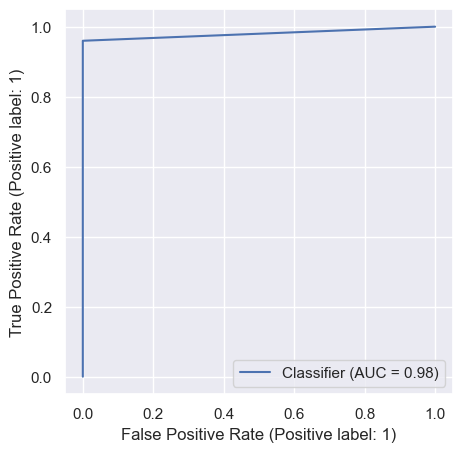

In [28]:
fig, ax = plt.subplots(figsize=(5,5))
svc_disp = RocCurveDisplay.from_predictions(y_test, y_pred, ax=ax)

plt.show();